<br>
<body>
    <p style="font-size:70px;text-align:center; color:#0070AD"><b>Hackathon 2023</b></p>
    <center><img src="./src/figures/mines_invent_logo.png" style="width:80%;height:auto"></center>
    <p style="font-size:55px;text-align:center; color:#12ABDB">Welcoming Notebook</p>
</body>
<br>

<br>
<p style="font-size:30px;color:#0070AD">Challenge Background </p>
<br>

<p style="text-align: justify">Since the signing of the Kyoto Protocol in 1997, the reduction of greenhouse gases and in particular CO$_2$ emissions has become a major issue for all private and public actors. This is a key point if we hope to meet the objectives of the 2015 Paris Conference on Global Warming (COP21) to limit global warming between 1.5°C and 2°C.</p>

<p style="text-align: justify">In this context, many companies take into account ESG (Environmental Social Governance) criteria in their long-term investment strategy to quantify the impact of the company's actions on the environment and society.</p>

<br>
<p style="font-size:30px;color:#0070AD">Challenge goals </p>
<br>

<p style="text-align: justify">A client wishing to improve the consideration of ESG criteria for his company calls on you to estimate the carbon emissions of the vehicles used by his employees to come to their workplace. Aware that it is necessary to take into account the carbon impact of its employees, the client would like you to provide a model capable of quickly estimating the carbon emission of a vehicle based on images from a video surveillance of the company's parking lot.</p>

<p style="text-align: justify">The images available contain only one vehicle and for each one the coordinates of a box locating the vehicle in the image are given.</p>

<p style="text-align: justify">Your model has to return as outputs the four coordinates of the box locating the vehicle and the vehicle's CO$_2$ carbon emission. Indeed given an image i containing a car, the output of the global model is as follows :</p>
    
<br>
<center>
    $(\hat{x}^{min}_{i},\hat{x}^{max}_{i},\hat{y}^{min}_{i},\hat{y}^{max}_{i},\hat{e}^{carbone}_{i})$
</center>
<br>  

Where : 
- $\hat{x}^{min}_{i}, \hat{y}^{min}_{i}$ predicted coordinates of top left corner of the box locating the vehicle.
- $\hat{x}^{max}_{i}, \hat{y}^{max}_{i}$ predicted coordinates of the bottom right corner of the box locating the vehicle.
    
To assess the results, we compute the following metric :</p>

<br>
<center>
    $\frac{1}{n}\sum_{i=1}^{n}{0.7\cdot{(1-IoU_i)} + 0.3\cdot\frac{\lvert e_i^{carbone} - \hat{e_i}^{carbone} \rvert}{e_i^{carbone}}}$
</center>

<br>
Where : 

- $IoU_i$ is the Intersection Over Union for the ith image
- $e_i^{carbone}$ the real carbon emission of the ith vehicle
- $\hat{e_i}^{carbone}$ the predicted carbon emission of the ith vehicle 

<p style="text-align: justify">Given four predicted coordinates $(\hat{x}^{min}_{i},\hat{x}^{max}_{i},\hat{y}^{min}_{i},\hat{y}^{max}_{i})$ and the four true coordinates $(x^{min}_{i}, x^{max}_{i}, y^{min}_{i}, y^{max}_{i})$ of the box locating a vehicle in an image, here are the steps to calculate the $IoU$.</p>

<p style="text-align: justify">First we calculate the top left and the bottom right corner of the intersection :</p>
<br>
<center>
    $x_{inter_{1}} = max(x^{min}_{i},\hat{x}^{min}_{i})$
</center>
<center>
    $x_{inter_{2}} = min(x^{max}_{i},\hat{x}^{max}_{i})$
</center>
<center>
    $y_{inter_{1}} = max(y^{min}_{i},\hat{y}^{min}_{i})$
</center>
<center>
    $y_{inter_{2}} = min(y^{max}_{i},\hat{y}^{max}_{i})$
</center>

<p style="text-align: justify">Then we calculate the area of the intersection :</p>
<center>
    $width\_inter = x_{inter_{1}} - x_{inter_{2}}$
</center>
<center>
    $height\_inter = y_{inter_{1}} - y_{inter_{2}}$
</center>
<p style="text-align: justify"></p>
<center>
    $area\_inter = height\_inter\cdot{width\_inter}$
</center>

<p style="text-align: justify">Then we calculate the area of each box :</p>
<center>
    $width\_box1 = \hat{x}^{max}_{i}-\hat{x}^{min}_{i}$
</center>
<center>
    $height\_box1 = \hat{y}^{max}_{i}-\hat{y}^{min}_{i}$
</center>
<center>
    $width\_box2 = x^{max}_{i}-x^{min}_{i}$
</center>
<center>
    $height\_box2 = y^{max}_{i}-y^{min}_{i}$
</center>
<p style="text-align: justify"></p>
<center>
    $area\_box1 = width\_box1\cdot{height\_box1}$
</center>
<center>
    $area\_box2 = width\_box2\cdot{height\_box2}$
</center>

<p style="text-align: justify">Finally we calculate the $IoU$:</p>
<center>
    $area\_union = area\_box1 + area\_box2 - area\_inter$
</center>
<p style="text-align: justify"></p>
<center>
    $IoU = \frac{area\_inter}{area\_union}$
</center>

<br>
<p style="font-size:30px;color:#0070AD">Data Description </p>
<br>

<p style="text-align: justify">The client has provided you with different data to answer the problem :</p>

<ul>
  <li><b>2653</b> images contained in the folder train.</li>
    <li>a csv file named <b>_annotation.csv</b> in the folder train_annotation with several variables :</li>
    <ul>
        <li><b>im_name</b>: image name.</li>
        <li><b>x_min</b>: the x coordinate of the top left corner of the box locating the vehicle.</li>
        <li><b>x_max</b>: the x coordinate of the bottom right corner of the box locating the vehicle.</li>
        <li><b>y_min</b>: the y coordinate of the top left corner of the box locating the vehicle.</li>
        <li><b>y_max</b>: the y coordinate of the bottom right corner of the box locating the vehicle.</li>
        <li><b>class</b>: What is the object inside the box.</li>
    </ul>
</ul>

<br>
<p style="font-size:30px;color:#0070AD">Deliverables </p>
<br>

<p style="text-align: justify">As part of this challenge, the client expects two deliverables from you : 
    <ul>
        <li> A scientific procedure document presenting the proposed approach and the results obtained regarding the metric presented above. You will find a template here.</li>
        <li>A pitch presenting your solution, its advantages, its feasibility to your client.</li>
    </ul>
</p>

<br>
<p style="font-size:30px;color:#0070AD">Challenge evaluation </p>
<br>

<p style="text-align: justify">Based on your deliverables, you are evaluated on 5 final criteria by a jury :</p>
<ul>
    <li><b>Model Performance</b> : The solution delivers a satisfactory score for the metric used.</li>
    <li><b>Innovation</b> : Your ability to surprise the jury with the format of the pitch or the presentation of the scientific procedure document.</li>
    <li><b>Scientific approach</b> : Clarity, rigor, justification and relevance of your scientific approach. This criteria is evaluated on the scientific procedure document.</li>
    <li><b>Interdisciplinarity</b> : Your ability to collaborate, organize your team, the diversity of member schools and your ability to include different competences in a project. This criteria is evaluated on the scientific document procedure and the final pitch.</li>
    <li><b>Best Business opportunity</b> : Your ability to present your solution well, whether it is on the strategy of valorization, how it fits in an ecological approach, the gestures during the presentation and your capacity of persuasion. This criteria is evaluated on the final pitch</li>
</ul>    
<br>
<p style="font-size:30px;color:#0070AD">Benchmark</p>
<br>

## Imports

In [25]:
import pandas as pd
from glob import glob
import numpy as np
import cv2

In [26]:
annot = pd.read_csv("../Hackathon_sample/train_annotation/_annotation.csv")

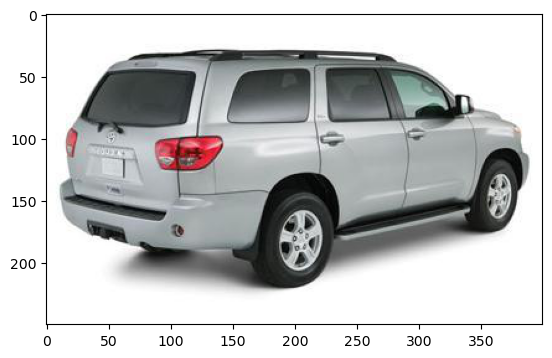

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

im = Image.open("../Hackathon_sample/train/1000407040.jpg")

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(im)


plt.show()

In [28]:
annot = annot.set_index('im_name')

In [29]:
annot.loc["1000407040.jpg"]

Unnamed: 0                       7688
x_min                             7.0
y_min                            26.0
x_max                           392.0
y_max                           225.0
class                             car
models        Toyota Sequoia SUV 2012
Name: 1000407040.jpg, dtype: object

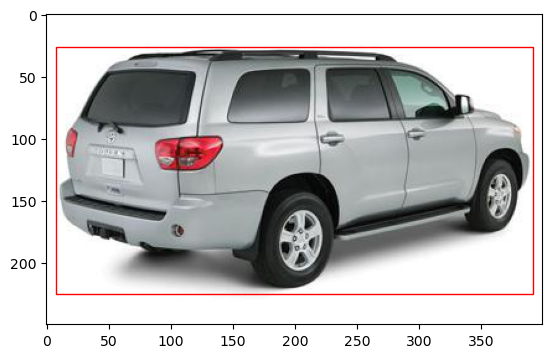

In [30]:
# Create figure and axes
fig, ax = plt.subplots()
ax.imshow(im)


# Create a Rectangle patch
rect = patches.Rectangle(xy = (annot.loc["1000407040.jpg"].x_min, annot.loc["1000407040.jpg"].y_min), 
                         width = annot.loc["1000407040.jpg"].x_max - annot.loc["1000407040.jpg"].x_min,
                         height = annot.loc["1000407040.jpg"].y_max - annot.loc["1000407040.jpg"].y_min,
                         linewidth=1, 
                         edgecolor='r',
                         facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
plt.show()

## Train dataset

In [31]:
images_train = glob("../Hackathon_sample/train/*")
im_names_train = [image.split('/')[-1] for image in images_train]

In [32]:
x_train = np.array([cv2.imread(image) for image in images_train])

/var/folders/7p/2k26bm652sbgtpbzk_9l9z500000gn/T/ipykernel_14903/544466056.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array([cv2.imread(image) for image in images_train])


In [33]:
x_train.shape

(2094,)

In [34]:
annot_train = pd.read_csv("../Hackathon_sample/train_annotation/_annotation.csv")
annot_train = annot_train.set_index('im_name')

In [35]:
y_train = np.array([annot_train.loc[image][['x_min', 'x_max', 'y_min', 'y_max']].values for image in im_names_train])

In [36]:
y_train.shape

(2094, 4)

## Test dataset

In [37]:
images_test = glob("../Hackathon_sample/test/*")
im_names_test = [image.split('/')[-1] for image in images_test]

In [38]:
x_test = np.array([cv2.imread(image) for image in images_test])

/var/folders/7p/2k26bm652sbgtpbzk_9l9z500000gn/T/ipykernel_14903/2671662918.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test = np.array([cv2.imread(image) for image in images_test])


In [39]:
x_test.shape

(1287,)

In [40]:
annot_test = pd.read_csv("../Hackathon_sample/test_annotation/_annotation.csv")
annot_test = annot_test.set_index('im_name')
annot_test

,Unnamed: 0,x_min,y_min,x_max,y_max,class,models
im_name,,,,,,,
1034878976.jpg,7955,41,175,614,399,car,Volkswagen Beetle Hatchback 2012
819068928.jpg,6263,131,135,533,297,car,Lamborghini Gallardo LP 570-4 Superleggera 2012
926416896.jpg,6892,19,539,1278,981,car,Plymouth Neon Coupe 1999
960692224.jpg,7333,15,134,626,382,car,Scion xD Hatchback 2012
368246784.jpg,2564,12,41,246,186,car,Chevrolet Silverado 1500 Classic Extended Cab ...
...,...,...,...,...,...,...,...
599392256.jpg,4442,87,72,738,501,car,Ford GT Coupe 2006
894369792.jpg,6660,149,1,988,727,car,Mercedes-Benz Sprinter Van 2012
293011456.jpg,2129,51,49,247,163,car,Chevrolet Corvette ZR1 2012


In [41]:
y_test = np.array([annot_test.loc[image][['x_min', 'x_max', 'y_min', 'y_max']].values for image in im_names_test])

In [42]:
y_test.shape

(1287, 4)

In [43]:
dataset = [(x_train[i], y_train[i]) for i in range(x_train.shape[0])]
dataset[0]

(array([[[90, 72, 61],
         [91, 73, 62],
         [92, 74, 63],
         ...,
         [97, 86, 82],
         [97, 86, 82],
         [97, 86, 82]],
 
        [[91, 73, 62],
         [91, 73, 62],
         [92, 74, 63],
         ...,
         [96, 85, 81],
         [96, 85, 81],
         [96, 85, 81]],
 
        [[92, 74, 63],
         [92, 74, 63],
         [92, 74, 63],
         ...,
         [97, 85, 81],
         [96, 84, 80],
         [96, 84, 80]],
 
        ...,
 
        [[24, 25, 23],
         [25, 26, 24],
         [25, 26, 24],
         ...,
         [28, 28, 28],
         [28, 28, 28],
         [27, 27, 27]],
 
        [[24, 25, 23],
         [24, 25, 23],
         [25, 26, 24],
         ...,
         [28, 28, 28],
         [27, 27, 27],
         [27, 27, 27]],
 
        [[24, 25, 23],
         [24, 25, 23],
         [24, 25, 23],
         ...,
         [27, 27, 27],
         [27, 27, 27],
         [27, 27, 27]]], dtype=uint8),
 array([39.0, 744.0, 229.0, 715.0], dtype=

## Vizualisation dataset

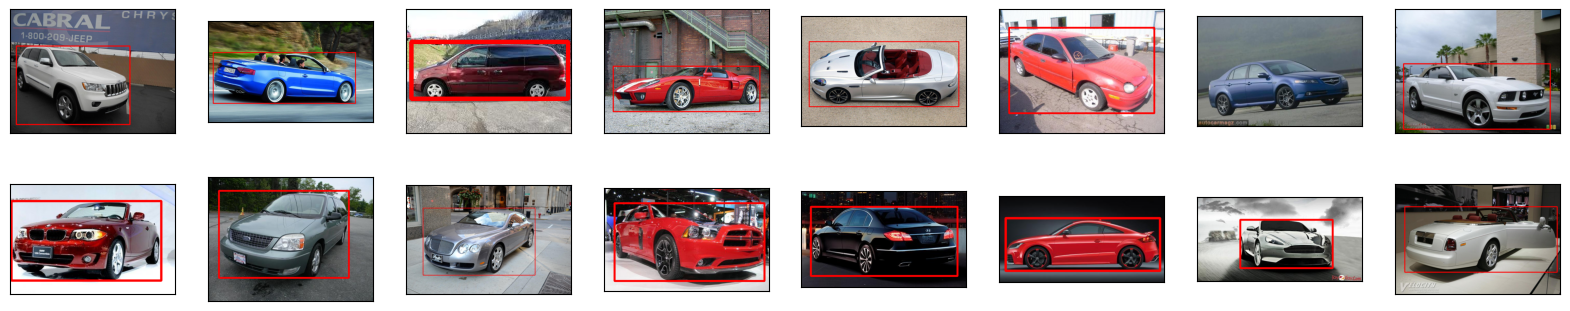

In [44]:
n = 16
plt.figure(figsize=(20, 4))
for i in range(n):
    image = x_train[i]
    coord = y_train[i]
    try:
        start_point = int(coord[0]), int(coord[2])
        end_point = int(coord[1]), int(coord[3])
    except:
        start_point = (0,0)
        end_point = (0,0)

    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    img_rect = cv2.rectangle(img_rgb, start_point, end_point, (255, 0, 0), 5)
    # display original
    ax = plt.subplot(n//8, 8, i+1)
    plt.imshow(img_rect,cmap='jet')
#    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## Segmentation model

In [52]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /Users/clementdesroches/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/clementdesroches/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [01:24<00:00, 557kB/s]


In [73]:
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

batch_size = 128
val_size = 50
train_size = len(dataset) - val_size 

train_data,val_data = random_split(dataset,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

#output
#Length of Train Data : 12034
#Length of Validation Data : 2000

#load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_data, batch_size*2, num_workers = 4, pin_memory = True)
train_dl

Length of Train Data : 2044
Length of Validation Data : 50


In [79]:
x_train[0].shape

(768, 1024, 3)